# Homework 2

## Your Name Here (or your names here if you are pair programming)

## Practicing Pandas


In [2]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Social Network Dataset

In this assignment we work with a social network dataset. 

You have 5 tables to work on. 

1. **person_knows_person**
This table represents the friendship between users. A person can have many friends. Persons have unique integer id number. 

2. **person_likes_post_file** 
This tables represents user likes. A person and a post is represented by IDs. 

3. **post_hasCreator_person**
A person creates many posts. Each post has a unique creator person id. 

4. **comment_replyOf_post**
This table represents comments on posts. Both post and comments have unique ids. 

5. **comment_hasCreator_person** 
A user can comment on posts. Each comment has a unique creator person id. 


In [3]:
url = "https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/main/datasets/social-media/"

person_knows_person_file = url + "person_knows_person.csv"
person_likes_post_file = url + "person_likes_post.csv"
post_hasCreator_person_file = url + "post_hasCreator_person.csv"
comment_replyOf_post_file = url + "comment_replyOf_post.csv"
comment_hasCreator_person_file = url + "comment_hasCreator_person.csv"

person_knows_person = pd.read_csv(person_knows_person_file,  sep='|')
person_likes_post = pd.read_csv(person_likes_post_file,  sep='|')
post_hasCreator_person = pd.read_csv(post_hasCreator_person_file,  sep='|')
comment_replyOf_post = pd.read_csv(comment_replyOf_post_file, sep='|')
comment_hasCreator_person = pd.read_csv(comment_hasCreator_person_file,  sep='|')

print(person_knows_person.head(5))
print("-------------------------")

print(person_likes_post.head(5))
print("-------------------------")

print(post_hasCreator_person.head(5))
print("-------------------------")

print(comment_replyOf_post.head(5))
print("-------------------------")

print(comment_hasCreator_person.head(5))
print("-------------------------")

   Person.id  Person.id.1
0         38          956
1         38          962
2         38          941
3         38           74
4         38           36
-------------------------
   Person.id  Post.id          creationDate
0         74        0  2012-10-15T05:13:41Z
1         36        0  2012-10-18T10:51:39Z
2        417       10  2012-11-18T11:14:47Z
3        415       10  2012-11-20T06:30:22Z
4        109       10  2012-11-19T11:03:52Z
-------------------------
   Post.id  Person.id
0        0         38
1       10         38
2       20         38
3       30         38
4       40         38
-------------------------
   Comment.id  Post.id
0           0        0
1          10        0
2          30        0
3          70        0
4         100       10
-------------------------
   Comment.id  Person.id
0           0         74
1          10        832
2          20        913
3          30        457
4          40        956
-------------------------


# Question - 1. Who are the top-10 users who have the highest number of friends? (4 points)
Count up the number of friends of each user and provide the top-10 of this number of friend count list. Print out their user IDs. 

In [4]:
# Code here
friends = person_knows_person['Person.id'].value_counts()
most_friends = friends.nlargest(10)
# add a column name
# make series into dataframe
# using dict

named_form = pd.DataFrame({'Person': most_friends.index, 'count': most_friends.values})
print(named_form['Person'])

0    336
1     40
2    959
3    811
4    938
5    430
6    296
7    165
8    804
9    918
Name: Person, dtype: int64


# Question - 2. Who wrote the most liked post?  (4 points)
Count up the number of likes for each post and find out who wrote that post. 
Print out the user id. If there are multiple maximum print them all. 

In [5]:
# Code here 
posts= person_likes_post['Post.id'].value_counts()
# add column names
named_post = pd.DataFrame({'Post.id': posts.index, 'counted_likes': posts.values})
most_liked_post = named_post[named_post['counted_likes']==9]

most_liked_person = most_liked_post.merge(post_hasCreator_person,left_on='Post.id',right_on='Post.id',how='left')
print(most_liked_person['Person.id'].drop_duplicates())

0        777
1        827
2        169
3          8
4        264
        ... 
10873    360
11610    161
12007    593
12307    968
12854    855
Name: Person.id, Length: 607, dtype: int64


# Question - 3. Who wrote the most influential post? The most influential post is the most discussed and most liked post. (4 points)

**Tip:** First, count up the number of comments and likes that each post has. Then find out which post it is, and finally find out who wrote that. 
Print out one user id. 


In [10]:
# Code here 
post_likes=person_likes_post.groupby('Post.id')['Person.id'].count().reset_index()


post_comms=comment_replyOf_post.groupby('Post.id')['Comment.id'].count().reset_index()


total_likes_comms=post_likes.merge(post_comms,left_on='Post.id',right_on='Post.id',how='left')

total_likes_comms['sums']=total_likes_comms['Person.id']+total_likes_comms['Comment.id']

max_s=total_likes_comms.sort_values(by='sums',ascending=False).iloc[0,3]

influential_id=total_likes_comms[total_likes_comms.sums==max_s].merge(post_hasCreator_person,left_on='Post.id',right_on='Post.id',how='left')['Person.id_y']
print(influential_id)
# ['Person.id_y'] 意思是只看 person id？这个person.id_y是默认名字吗？
# A：默认后缀 _y, 前面和后面表重合了，Person.id_x
# 这里的两个post.id会自动组合吗？即左边postid 0 会与右边 postid 0 自动组合？如果右边不存在postid 0呢？postid0的comment id=NaN？需要替换0吗？
# A:是的。左表有，右表没有，右表值为NaN；左表没有personid0，右表有personid0，以左边为准，不会出现personid0这一行
print('The person.id of most influential post is',influential_id[0])

0    325
1    649
2    794
3    245
4     15
5     23
Name: Person.id_y, dtype: int64
The person.id of most influential post is 325


# Question - 4. Create two histograms for the distributions of the number of likes and comments that users have. (4 points)
Describe the shape of these data two data distributions. 

**Tip:** First perpare two lists of number of likes and number of comments that users have done. You need to count up how many likes and how many comments each unique user id has. 

0      2223
1        32
2         0
3       560
4       592
       ... 
993     374
994    1657
995     213
996    1801
997       0
Name: Post.id, Length: 998, dtype: int64


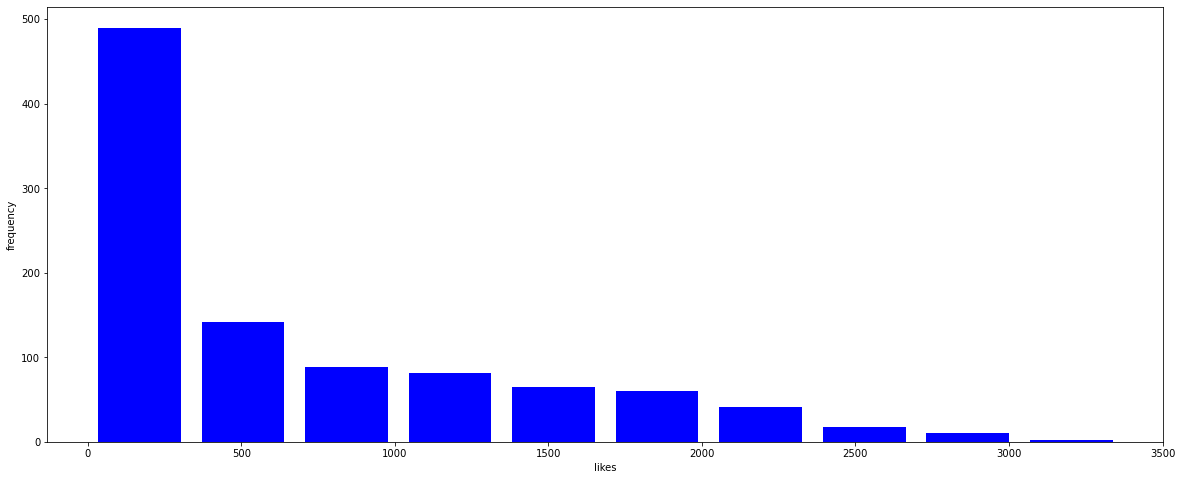

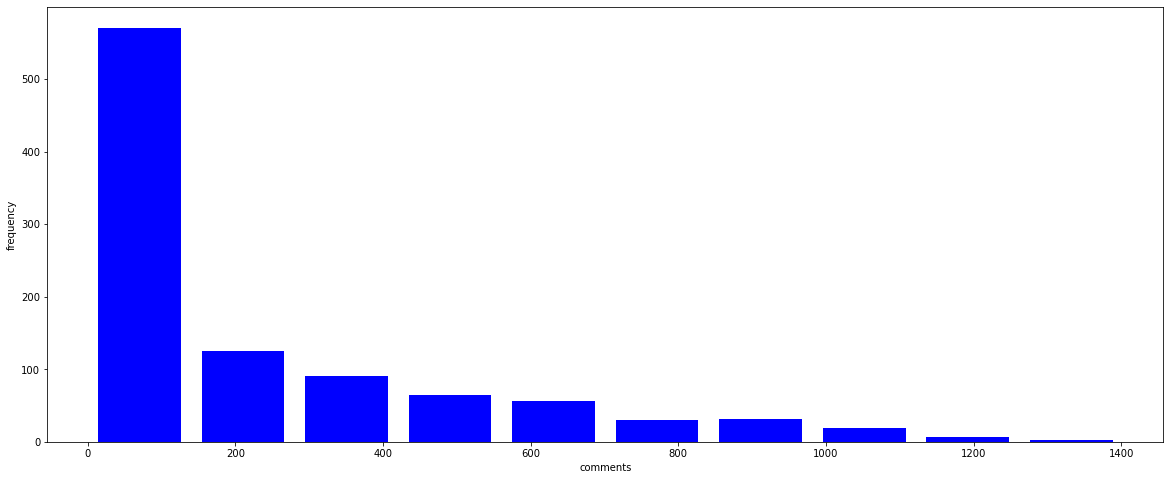

In [11]:
person_id=person_knows_person[['Person.id']].drop_duplicates().reset_index(drop=True)
# what's drop=True here?
# A: 删除原索引
likes=person_id.merge(person_likes_post,left_on='Person.id',right_on='Person.id',how='left').groupby('Person.id')['Post.id'].count().reset_index()['Post.id']
# groupby('Person.id')['Post.id'].count()
# reset_index()['Post.id']
# 可以一直这样连下去吗？
# A：首先需要知道总的用户数和点赞的用户数，没有点赞的地方是 NaN 
# count 时自动将NaN变成0
# groupby 为 用户分组，id为2的person，post.id一共出现9个，分为id2的组，再对他进行操作
comms1=comment_replyOf_post.merge(comment_hasCreator_person,left_on='Comment.id',right_on='Comment.id',how='left')
comms2=person_id.merge(comms1,left_on='Person.id',right_on='Person.id',how='left')
Comments=comms2.groupby('Person.id')['Comment.id'].count().reset_index()['Comment.id']
data=likes
plt.figure(figsize=(20,8))
# what's figsize for?
# 长为20，宽为8的一张图
plt.hist(x = data, bins = 10, rwidth=0.8,color = 'blue')

plt.xlabel('likes')
plt.ylabel('frequency') 

plt.show()

data=Comments

plt.figure(figsize=(20,8))
plt.hist(x = data,bins = 10,rwidth=0.8, color = 'blue')

plt.xlabel('comments')
plt.ylabel('frequency') 




plt.show()

# Question - 5. What is the Pearson correlation coefficient between the number of comments and the number of likes that users do on the social network? (4 points)

Print out one number. 



**Tip:** You can calculate correlation coefficient using the following formula: 
Assume that x and y are two arrays of data, in this case number of likes and comments of each user. 


\begin{align*}
r= {{ n(\sum x y ) - (\sum x ) (\sum y)    } \over { \sqrt{ [ n \sum x^2  -
(\sum x)^2 ] [ n\sum y^2 - (\sum y )^2 ] } } }
\end{align*}











In [10]:
x=likes
y=Comments

p1=len(x)*(sum(np.array(x)*np.array(y)))-x.sum()*y.sum()

p2_1=len(x)*sum(np.array(x)**2)-sum(x)**2
p2_2=len(x)*sum(np.array(y)**2)-sum(y)**2
p2=np.sqrt(float(p2_1)*float(p2_2))

# how to eliminate NaNs here?
# why n = len(x)?
# x,y个数是一样的，所以随便选了一个variable的数量
r=p1/p2

print(r)

0.924859384191192
